In [ ]:
# Import necessary libraries
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Step 1: Read in a black/white photo and convert it into a matrix
image = data.coins()  # You can replace this with your own image loading logic
# Step 2: Perform singular value decomposition (SVD)
U, S, Vt = np.linalg.svd(image, full_matrices=False)

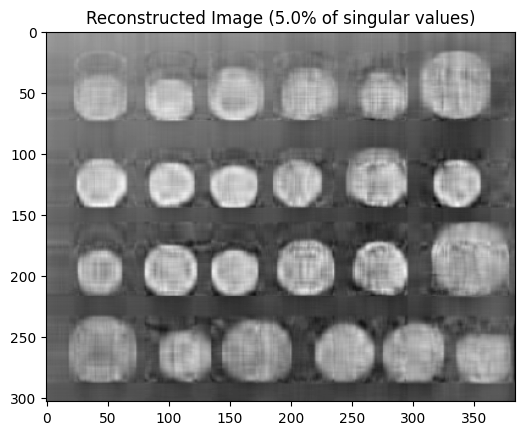

Percent of Frobenius norm retained for 5.0% singular values: 98.62%



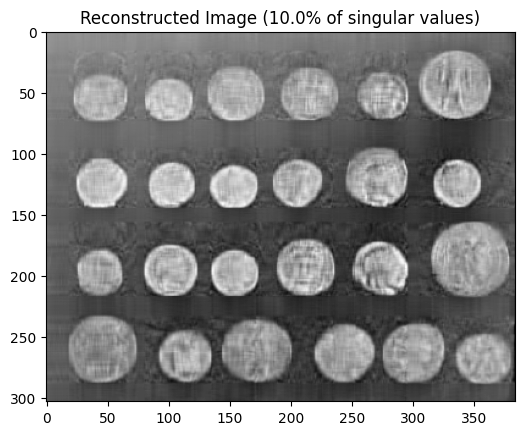

Percent of Frobenius norm retained for 10.0% singular values: 99.28%



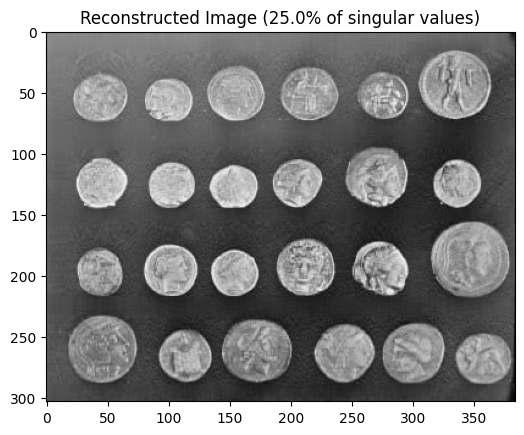

Percent of Frobenius norm retained for 25.0% singular values: 99.80%



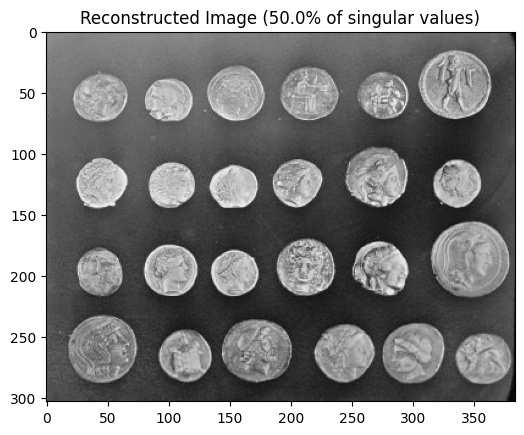

Percent of Frobenius norm retained for 50.0% singular values: 99.97%



In [10]:
# Step 3: Reconstruct the photo using different percentages of singular values
percentages = [0.05, 0.1, 0.25, 0.5]

for percent in percentages:
    # Calculate the rank to retain based on the given percentage
    rank = int(min(image.shape) * percent)

    # Reconstruct the image using the selected singular values
    reconstructed_image = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vt[:rank, :]))

    # Step 4: Print the reconstructed photo
    plt.figure()
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image ({percent * 100}% of singular values)')
    plt.show()

    # Step 5: Calculate the Frobenius norm and print the result
    frobenius_norm_original = np.linalg.norm(image, 'fro')
    frobenius_norm_reconstructed = np.linalg.norm(reconstructed_image, 'fro')
    retained_norm_percent = (frobenius_norm_reconstructed / frobenius_norm_original) * 100

    print(f"Percent of Frobenius norm retained for {percent * 100}% singular values: {retained_norm_percent:.2f}%\n")

As we can see using only 5% of values we obtain a blurry image(that is good considered the very few values taken) with a Frobenius norm of 98.62% and with 50% of values the Frobenius norm is of 99.97 and we can see that that image printed is very clear.